# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide.
In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [91]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.


In [92]:
# Minimum price of the data
minimum_price = min(prices)

# Maximum price of the data
maximum_price = max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

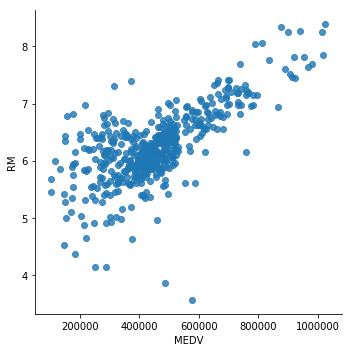

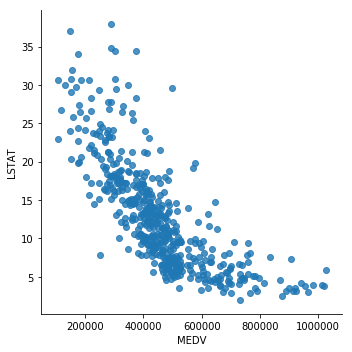

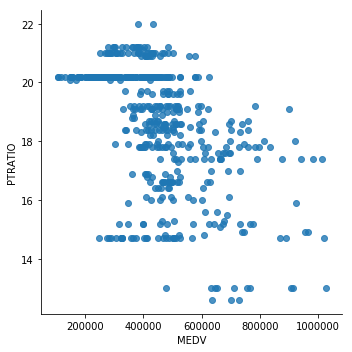

In [93]:
import seaborn as sns
sns.lmplot(x = 'MEDV', y = 'RM', data = data, fit_reg = False)
sns.lmplot(x = 'MEDV', y = 'LSTAT', data = data, fit_reg = False)
sns.lmplot(x = 'MEDV', y = 'PTRATIO', data = data, fit_reg = False)

**Answer:** 
**The scatterplots above gives better intuition about the impact of each of three independant variable RM, LSTAT and PTRATIO on dependant variable MEDV. Also, it helps in knowing which features are important in deciding the housing prices.**

**1.Looking at first scatterplot of MEDV vs RM, we can see the upward trend of increase in housing price with increase in average number of rooms with some exceptions which can be ignored to conclude that the RM feature does impact the dependant variable MEDV positively. Thus, average number of rooms in neighborhood should be consisdered as important feature in deciding the price of a house and we can expect increase in house price(MEDV) with increase in number of rooms(RM).**

**2.On the other hand, second scatterplot of MEDV vs LSTAT shows downward trend which infers that the housing decreases(MEDV) with increase in precentage of lower class neighborhood(LSTAT) and there are some exceptions here as well. Hence, LSTAT should also be considered as an important feature in deciding the price of house and its impact on independent variable MEDV is negative, that is, the housing price is expected to decrease with increase in lower class neighborhood percentage.**

**3.However, third scatterplot for MEDV vs PTRATIO doesn't show any clear trends and there are various examples where housing price has significant fluctuation when the ratio of student to teacher(PTRATIO) is same. So, PTRATIO doesn't have much impact on housing price and we can not expect significant increase/decrese in housing price with change in student to teacher ratio.** 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

In [94]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [95]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**
**Coefficient of determination (R2 score) is basically the square of correlation between predicted score and actual test values which can also be given by 1-(square sum of difference between actual value and predicted value)/(square sum of difference between actual value and mean of actual values), where square sum of difference between actual value and predicted value is basically the best fitted line to the data that can calculated by minimum sum of square difference function and square sum of difference between actual value and mean of actual values(variance) can be average line plotted for data points. So, lower the ratio of residual sum of square and square of mean difference higher will be the coefficient of determination. Here, R2 score of above model is 0.923 which is close to ideal R2 score and it means that square sum of difference between actual value and predicted value is very low. Hence, it can be considered that this model has successfully captured the variation of target variable.**

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [96]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 48)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **
**Machine Learning is basically making the Machine/computer learn from past experience in form of data and based on that make it predict the future outcomes. Machine Learning model in supervised learning is created to make machine/computer learn correlation between one or more independent variables and dependent variable within the data. This model is then used to make predict outcome of unknown dependent variable based on given independent variables. So, it is essential to test model and validate its performance on unknown outcomes. Hence, it is common practice to split dataset into training dataset which is used to train machine learning model and testing dataset that can be used to validate performance of trained model on unknown outcomes.**

**There are two main issues when training a model overfitting and underfitting. Overfitting occurs when model tends to memorize the training data instead of learning and hence, it would be able to predict known outcomes very well but wouldn't predict unknown outcomes accurately. While, underfitting occurs when model fails to learn the training data and so, it wouldn't be able to predict both known and unknown outcomes accurately. The problem of overfitting can sometimes be addressed by using more training dataset to train the model, but it is also important to validate the accuracy of model with sufficient amount of testing dataset and hence, keeping the ratio of training and testing between 70/30-80/20 percent is considered to be good practice.**

**The problem of overfitting cann't be solved everytime by just giving model more training data because the root-cause of overfitting and underfitting lies in selecting hyper-parameters(depth in decision tree) and parameters(threshold value of nodes) value. So, training and testing model with different hyper-parameters and parameters value becomes essential to avoid overfitting or underfitting. When model is trained with different hyper-parameters and parameters values, it should be validated on another dataset split known as cross-validation data to avoid bias on test data and finally, validate model with best performance on cross-validation data using specific set of parameter values should be validated on test data.**

**Also, this can be by splitting data into multiple folds where one fold should be kept seperate as test data, while data inside all other folds should be split into training and cross-validation data. Each of these folds can be used to train and test model with different parameters values and fold with best performance on its cross validation data should be finally used for validation on remaining test data fold. This process is a type of K - fold cross validation technique.**

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

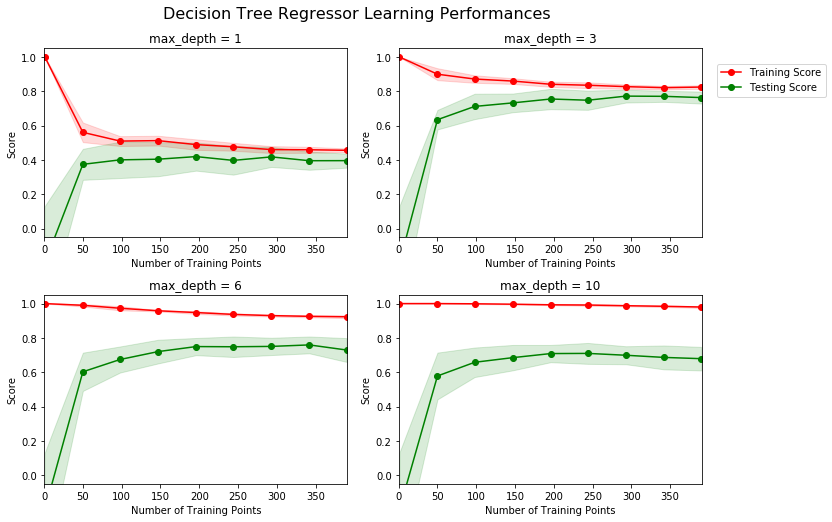

In [97]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **
**Graph-1 (max_depth=1): First graph where max_depth=1 shows that training score starts off well with small training data which decreases significantly as number of training data increases until certain point before becoming constant, while testing score is very low with small amount of training data which increases to an extent with increase in training data before becoming constant and almost converges to training score. Here, model seems to be suffering from high bias as it is making high error on both training and testing data with increase in training points and it wouldn't benefit from more training points.**

**Graph-2 (max_depth=3): In second graph with max_depth=3, the training score curve remains constant around 0.8 after decreasing from 1 as training points increases, on the other hand, test score remains constant at the same point after increasing from 0 as training points increases and nearly converges to training score. This model can be said to be good fit as testing error decreases significantly as training point increases and model would benefit with more training points.**

**Graph-3, Graph-4(max_depth=6, max_depth=10): In third and fourth graph with max_depth=6 and max_depth=10, model seems to be overfitting the training data as training score remains contants around 0.9 and 1 respectively, while testing score curve increases significantly before becoming constant around 0.7 and 0.8 respectively. It can be said that model with max_depth=6 would perform better than model with max_depth=10 as it makes less error on testing data and would benefit more with increase in training points.**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

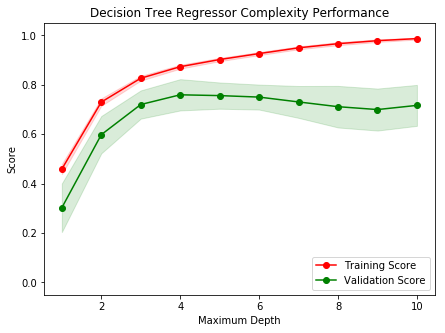

In [98]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **
**The above graph of maximum depth vs score depicts that both training score and validation score are very low at 0.3 aand 0.4 respectively when maximum depth is 1 which means that model makes high error in predicting both training data and testing data. Hence, model suffers from high bias as it wasn't able to learn training data with maximum depth of 1.**

**As maximum depth increases, training score increases gradually and testing score increase significantly before becoming constant around 0.7 after maximum depth=3. At maximum depth of 10, training score rises to 1 which means that model doesn't make any error on training data, while testing score remains around 0.7. So, model suffers from high variance at maximum depth of 10 as it becomes very complicated and memorizes the training data but fails to predict test data accurately.**

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **
**Above graph of maximum depth vs score shows that training score gradually increases with increase in maximum depth which mean model makes less error on training data with increase in maximum depth, while the validation score increases significantly with increase in maximum depth until a certain point after which it becomes constant and even decreases a bit with higher maximum depth. Looking at the graph, I believe that model with maximum depth of 4 best generalizes to unseen data without overcomplicating/overfitting the training data. Validation score curve reaches at the peak when maximum depth is 4 after which the curve decreases slightly and fluctuate around the same mark which means that model makes least error on validation data at maximum depth of 4. Also, model fits well on training data at maximum depth of 4, making reasonable predictions, after which the training score increases graduatually before reaching 1 at maximum depth of 10 that means model starts memorizing the training data after maximum depth of 4, helping it in making better predictions on training data but not on validation data.**

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **
**In most cases of creating a supervised Machine Learning model, it is essential to tune the hyper-parameter and parameter values to get good fit of data that can make better predictions on unknown outcomes and avoid underfitting or overfitting of training data which makes poor predictions on testing data. The examples of hyper-parameter and parameter can be maximum depth and threshold value for each node in decision tree respectively or the kernel and C value are examples of hyper-parameters of support vector machines. Mostly, we don't know what values of hyper-parameters or hyper-parameter and parameter pair will give best performance on predicting the unknown outcomes which we validate using different validation metrics like confusion matrix, F1 score and R2 score. So, we train the model with different value pairs of hyper-parameters and parameters manually. Then, each of this model with different value pairs of parameter can be validated on cross-validation set using some validation metrics and model with best performance using specific parameters value pair should be selected and finally tested on test data. This method of training model with different value pair of hyperparameters or hyperparameter and parameter is called Grid Search technique where model is trained and tested with one combination of parameters values, then other and so on.** 

**Python provide GridSearchCV function from sklearn.model_selection library to perform grid search where GridSearchCV function takes various arguments like type of model, different sets of parameter values which are given in form of dictionary(where keys represents the type of hyper-parameter or parameter), validation metrics like R2 score or F1 score and training technique used to train and test model.** 

**The example of parameters passed to GridSearch function for SVM is:
param = {C = [1.0, 5.0, 10.0], Kernel = ['poly',' linear']}
Here, Grid search algorithm trains and test SVM model with different value pairs of C and Kernel like:**

**svm.SVC(c = 1.0, Kernel = 'poly') svm.SVC(c = 1.0, Kernel = 'linear')**

**svm.SVC(c = 5.0, Kernel = 'poly') svm.SVC(c = 5.0, Kernel = 'kernel')**

**svm.SVC(c = 10.0, Kernel = 'poly') svm.SVC(c = 10.0, Kernel = 'linear')**

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **
**K-fold cross-validation training is a technique extensively used to train and validate model using GridSearchCV algorithm where model is trained and validiated with different combinations of values for hyperparameter and parameter. This technique efficiently addresses the short coming of using simple train-test split when training model using Grid Search. When using Grid Search with simple train-test split, model will first be trained with some combination of parameters values and validated on test data, then again trained on different combination of parameters value and validated on test data. But, when validating model on test data using first combination of parameters values, the information of test data is already leaked to training data and hence, this will introduce some bias when training model again with different combination of parameters values. This issue can be addressed by introducing new split called validation data, but then it will reduce the amount of training data to train model and so, K-fold cross validation comes handy here.**

**In k-fold cross-validation training technique, training data is split into small sets where each of split contains several numbers of folds. This number of folds is given by K and known as K fold. Model is trained using K-1 folds and it is validated with some validation metrics on a remaining fold that acts as validation data and this process is repeated k times. This process gives us average performance score of all the k-folds. This method is computionally expensive, but it is very effective and could be used with small amount of training data.**


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.


In [99]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,10)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [100]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **
**The optimal model that we get here is with maximum depth of 4. My guess in Question 6 of getting optimal model was also model trained with maximum depth of 4. It was quite evitable from the graph as model with maximum depth of 4 had highest validation score which means that it was able to predict unknown outcome with high accuracy without overfitting the training data and making it too complicated.**

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [101]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $407,505.00
Predicted selling price for Client 2's home: $213,300.00
Predicted selling price for Client 3's home: $939,225.00


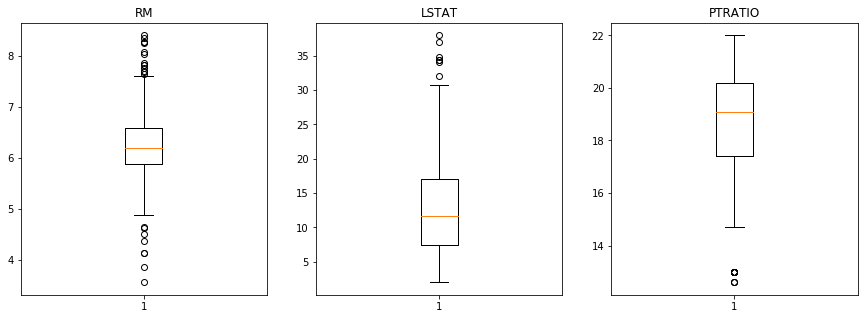

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(col)

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0


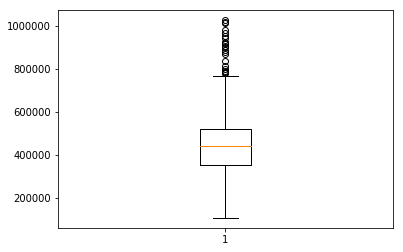

In [103]:
plt.boxplot(data['MEDV'])
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))

**Answer: **
**The price I would recommend to each client is:**

**Client 1: $407,505**

**Client 2: $213,300**

**Client 3: $939,225**

**Client 1: Client 1 has 5 rooms which are comparatively less, house is around neighborhood with 17% poverty which is quite high and student to teacher ratio is 15:1 that is low but it doesn't have much weightage in deciding price of house. So, I would recommend $407,505 house price to client 2 which is around the mean.**

**Client 2: Client 2 has 4 room which are very less than neighborhood and also, the poverty rate is very high which is 32%. As discussed previously, the prices of house tend to increase with more number of rooms and decreases with increase in percent of poverty level. Hence, I would recommend very low house price $213,300 to client 2 which is slightly more than minimum price of house.**

**Client 3: With most number of rooms(8 rooms) and very low poverty level(3%), I would recommend very high house price $939,225 to Client 3 which is around maximum price of other houses used in training set.**




### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [104]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **
**In my view, the architecture and techniques that I used to build model to predict housing rate can be used in real-world setting. But, the data of 1978 that I used to train this model is very outdated which can't be used to predict housing rates today as there is vast change in demography and also, the inflation rate has increased which has increased the rates of houses upto higher extent. Moreover, the features present in data are not sufficient in real world setting today to predict housing price. There are various other factors like availability of parking spots, crime rate, square feet and ammenities which can impact have significant impact in deciding the price of house. Model which is trained using data of urban city like Boston shouldn't be used to predict housing price of rural area or even other urban cities which has different demography and inflation rates. However, it would be fair and rather effective to predict the price of house based on characteristics of neighborhood. To conclude, I would say that this model architecture and technique would be effective in predicting housing price in real world setting, but it should be trained with latest available data and additional features.**    

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.